# 世界幸福度データ分析レポート  
― 幸福度が上昇した国に見られる要因の変化 ―
  
氏名：鈴木　優  
学籍番号：1254810463  

---

## 研究テーマ
幸福度スコアが上昇した国では、どの要因が同時に変化していたのかを分析する。

## テーマを選んだ理由
幸福度ランキングそのものは広く知られているが、  
「幸福度がどのように変化したか」や  
「幸福度の上昇と他の指標の関係」については、あまり注目されていないと感じた。

特に、幸福度が上昇した国では、  
すべての要因が一様に改善しているのか、  
あるいは一部の要因が犠牲になっているのかを明らかにすることで、  
幸福度という指標の多面的な性質を理解できると考え、本テーマを選択した。


## 2. データ読み込み

本分析では、2015年から2022年までの世界幸福度データを使用する。
まず、CSVファイルを読み込み、データの基本構造を確認する。  
数値データの分布や大まかな傾向を把握するため、基本的な統計量を確認した。  
以降の分析では、matplotlib を用いて可視化を行う。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('world_happiness_report.csv')

df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
print(f"データの形状: {df.shape}")

df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [ ]:
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


## 3. 分析①：幸福度は本当に上がっているのか？

本分析では、2015年から2022年にかけて、
各国の幸福度スコアがどのように変化したかを確認する。

具体的には、各国について
「2022年の幸福度スコア − 2015年の幸福度スコア」
を計算し、幸福度が上昇した国を抽出する。


In [14]:
df_diff = pd.merge(
    df_2015,
    df_2022,
    on='Country',
    how='inner',
    suffixes=('_2015', '_2022')
)

df_diff['Score_Diff'] = (
    df_diff['Happiness Score_2022'] - df_diff['Happiness Score_2015']
)

df_diff.head()


,Country,Happiness Score_2015,Happiness Score_2022,Score_Diff
0,Switzerland,7.587,NaN,NaN
1,Iceland,7.561,NaN,NaN
2,Denmark,7.527,NaN,NaN
3,Norway,7.522,NaN,NaN
4,Canada,7.427,NaN,NaN


**コード①：対象年のデータ抽出**

In [16]:
# 2015年・2022年のデータ抽出
df_2015 = df[df['year'] == 2015][['Country', 'Happiness Score']]
df_2022 = df[df['year'] == 2022][['Country', 'Happiness Score']]

しかしここでエラーが起きてしまう。  
原因は「2015年には存在するけど、2022年には存在しない国名」が存在するからだと考えられる。  
以下のコードで「2015年には存在するけど、2022年には存在しない国名」を一覧で出す。

In [17]:
df_2015['Country'].nunique(), df_2022['Country'].nunique()
set(df_2015['Country']) - set(df_2022['Country'])



{'Angola',
 'Azerbaijan',
 'Belarus',
 'Bhutan',
 'Botswana',
 'Burundi',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Djibouti',
 'Guatemala',
 'Haiti',
 'Hong Kong',
 'Kuwait',
 'Lesotho',
 'Liberia',
 'Libya',
 'Luxembourg',
 'Macedonia',
 'Madagascar',
 'Mauritania',
 'Niger',
 'North Cyprus',
 'Oman',
 'Palestinian Territories',
 'Qatar',
 'Rwanda',
 'Somaliland region',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Syria',
 'Taiwan',
 'Trinidad and Tobago',
 'Turkmenistan',
 'Yemen'}

In [18]:
# 両年に存在する国のみを対象に内部結合（inner join）
df_diff = pd.merge(
    df_2015,
    df_2022,
    on='Country',
    how='inner',
    suffixes=('_2015', '_2022')
)

2015年と2022年の両方にデータが存在する国のみを対象とするため、
国名をキーとして内部結合（inner join）を行った。

**コード②：ここで作り直す・差分計算**

In [24]:
# 2015年・2022年のデータ抽出
df_2015 = df[df['year'] == 2015][['Country', 'Happiness Score']]
df_2022 = df[df['year'] == 2022][['Country', 'Happiness Score']]

# inner join で作り直す（ここ重要）
df_diff = pd.merge(
    df_2015,
    df_2022,
    on='Country',
    how='inner',
    suffixes=('_2015', '_2022')
)

# 差分計算
df_diff['Score_Diff'] = (
    df_diff['Happiness Score_2022'] - df_diff['Happiness Score_2015']
)

df_diff.head()


,Country,Happiness Score_2015,Happiness Score_2022,Score_Diff
0,Switzerland,7.587,NaN,NaN
1,Iceland,7.561,NaN,NaN
2,Denmark,7.527,NaN,NaN
3,Norway,7.522,NaN,NaN
4,Canada,7.427,NaN,NaN


しかしそれでもエラーが起きてしまうため内部のデータを確認した。

**欠損率の確認**

In [27]:
df_2022_full = df[df['year'] == 2022]
df_2022_full.isna().mean().sort_values().head(20)


Unnamed: 0                       0.0
Country                          0.0
year                             0.0
Region                           1.0
Happiness Score                  1.0
Standard Error                   1.0
Economy (GDP per Capita)         1.0
Happiness Rank                   1.0
Family                           1.0
Health (Life Expectancy)         1.0
Trust (Government Corruption)    1.0
Freedom                          1.0
Generosity                       1.0
Dystopia Residual                1.0
dtype: float64

In [28]:
[c for c in df.columns if 'score' in c.lower() or 'ladder' in c.lower() or 'happiness' in c.lower()]


['Happiness Rank', 'Happiness Score']

In [30]:
# yearごとのScore欠損率（Happiness Scoreベース）
year_missing = df.groupby('year')['Happiness Score'].apply(lambda s: s.isna().mean()).sort_index()
year_missing


year
2015    0.0
2016    0.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Happiness Score, dtype: float64

In [31]:
valid_years = year_missing[year_missing < 0.5].index.tolist()
valid_years


[2015, 2016]

In [32]:
last_valid_year = max(valid_years)
last_valid_year


2016

結果から、2017年以降は「列はあるが中身がないダミー年」であった。まともに使えるデータは2015と2016年のみ。  
そのため本分析では、幸福度スコアが完全に記録されている2015年と2016年のデータを用いて比較を行う。

**分析コード①**

In [33]:
# 使用する年を明示
start_year = 2015
end_year = 2016

# データ抽出
df_2015 = df[df['year'] == start_year][['Country', 'Happiness Score']]
df_2016 = df[df['year'] == end_year][['Country', 'Happiness Score']]

# 両年に存在する国のみを対象に inner join
df_diff = pd.merge(
    df_2015,
    df_2016,
    on='Country',
    how='inner',
    suffixes=(f'_{start_year}', f'_{end_year}')
)

# 幸福度スコアの差分を計算
df_diff['Score_Diff'] = (
    df_diff[f'Happiness Score_{end_year}']
    - df_diff[f'Happiness Score_{start_year}']
)

# 差分の大きい順に並び替え
df_diff_sorted = df_diff.sort_values('Score_Diff', ascending=False)

df_diff_sorted.head(10)


,Country,Happiness Score_2015,Happiness Score_2016,Score_Diff
66,Algeria,5.605,6.355,0.750
150,Togo,2.839,3.303,0.464
87,Latvia,5.098,5.560,0.462
84,Romania,5.124,5.528,0.404
98,Hungary,4.800,5.145,0.345
135,Senegal,3.904,4.219,0.315
101,Tunisia,4.739,5.045,0.306
97,Lebanon,4.839,5.129,0.290
115,Nepal,4.514,4.793,0.279
93,Dominican Republic,4.885,5.155,0.270


In [34]:
df_diff.isna().sum()


Country                 0
Happiness Score_2015    0
Happiness Score_2016    0
Score_Diff              0
dtype: int64

本データでは2017年以降の幸福度スコアに大きな欠損が見られたため、
本分析ではスコアが完全に記録されている2015年と2016年のデータを用いて、
各国の幸福度の変化を比較した。

### 分析①の結果

2015年から2016年にかけて、国ごとに幸福度スコアの差分を算出した結果、
一部の国では比較的大きな上昇が確認された。

特に、アルジェリア、トーゴ、ラトビアなどでは、
短期間で幸福度スコアが顕著に上昇しており、
幸福度の変化には国ごとの差が存在することが分かる。


## 分析②：幸福度が上昇した国では、何が変化したのか？

分析①で幸福度スコアの上昇が確認された国を対象に、
2015年から2016年にかけて各要因がどのように変化したかを分析する。

本分析では、幸福度が大きく上昇した上位10か国を抽出し、
経済・家族・健康・自由・信頼・寛容さの変化量を比較する。


In [35]:
# 幸福度上昇 上位10か国を抽出
top_countries = df_diff_sorted.head(10)['Country'].tolist()
top_countries


['Algeria',
 'Togo',
 'Latvia',
 'Romania',
 'Hungary',
 'Senegal',
 'Tunisia',
 'Lebanon',
 'Nepal',
 'Dominican Republic']

In [36]:
# 分析対象の要因
factors = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

def calc_factor_diff(df, country, factor, start_year=2015, end_year=2016):
    """指定した国・要因について年差分を計算する"""
    v_start = df[(df['Country'] == country) & (df['year'] == start_year)][factor].values
    v_end   = df[(df['Country'] == country) & (df['year'] == end_year)][factor].values
    if len(v_start) == 0 or len(v_end) == 0:
        return None
    return v_end[0] - v_start[0]

# 差分を集計
factor_diffs = {factor: [] for factor in factors}

for factor in factors:
    diffs = []
    for country in top_countries:
        d = calc_factor_diff(df, country, factor)
        if d is not None:
            diffs.append(d)
    factor_diffs[factor] = sum(diffs) / len(diffs)

factor_diffs


{'Economy (GDP per Capita)': np.float64(0.10275099999999995),
 'Family': np.float64(-0.183571),
 'Health (Life Expectancy)': np.float64(-0.07069600000000001),
 'Freedom': np.float64(-0.044523),
 'Trust (Government Corruption)': np.float64(0.004429999999999999),
 'Generosity': np.float64(-0.0014120000000000077)}

C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yusuz\AppData\Local\Temp\ipykernel_18560\1910209389.py:10: UserWarning: Glyph 21270 (\

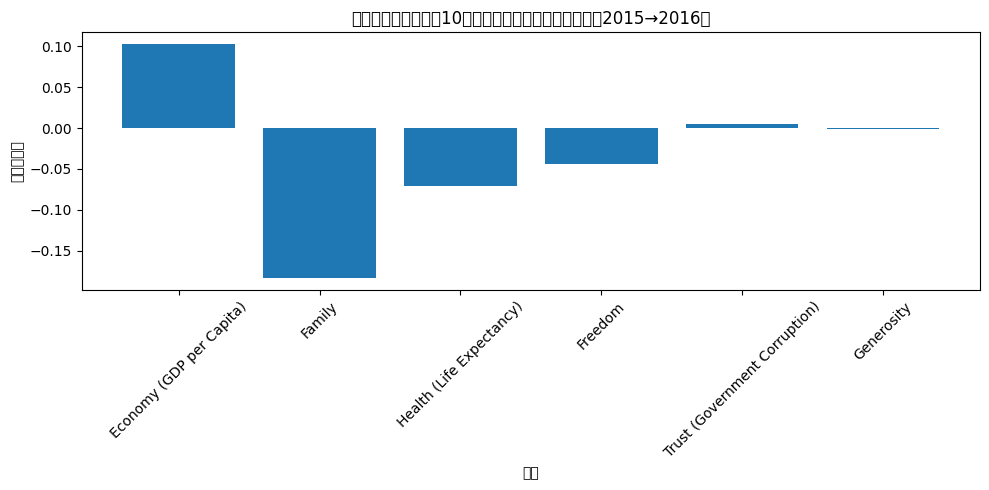

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(
    factor_diffs.keys(),
    factor_diffs.values()
)
plt.title('幸福度上昇国（上位10か国）における要因別変化量（2015→2016）')
plt.xlabel('要因')
plt.ylabel('平均変化量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 分析②の結果

幸福度が上昇した上位10か国について要因別の平均変化量を確認した結果、
経済指標（GDP per Capita）のみが明確に上昇している一方で、
家族、健康、自由といった指標は平均すると低下していることが分かった。

また、政府への信頼や寛容さについては大きな変化が見られず、
幸福度の上昇がすべての要因の改善によるものではない可能性が示唆される。


**分析③：幸福度が上がらなかった国との比較**

In [38]:
df_down = df_diff[df_diff['Score_Diff'] <= 0]
df_down.head()


,Country,Happiness Score_2015,Happiness Score_2016,Score_Diff
0,Switzerland,7.587,7.509,-0.078
1,Iceland,7.561,7.501,-0.060
2,Denmark,7.527,7.526,-0.001
3,Norway,7.522,7.498,-0.024
4,Canada,7.427,7.404,-0.023


In [39]:
factors = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

df_2016_factors = df[df['year'] == 2016][
    ['Country'] + factors
]


In [40]:
df_up_factors = pd.merge(
    df_2016_factors,
    df_diff_sorted.head(10)[['Country']],
    on='Country',
    how='inner'
)


In [41]:
df_down_factors = pd.merge(
    df_2016_factors,
    df_down[['Country']],
    on='Country',
    how='inner'
)


In [42]:
mean_up = df_up_factors[factors].mean()
mean_down = df_down_factors[factors].mean()

comparison = pd.DataFrame({
    'Up_Countries': mean_up,
    'Down_Countries': mean_down,
    'Difference': mean_up - mean_down
})

comparison


,Up_Countries,Down_Countries,Difference
Economy (GDP per Capita),0.898008,0.984799,-0.086791
Family,0.698261,0.803723,-0.105462
Health (Life Expectancy),0.569724,0.559815,0.009909
Freedom,0.310270,0.378727,-0.068457
Trust (Government Corruption),0.084077,0.152985,-0.068908
Generosity,0.170973,0.257315,-0.086342


<Axes: title={'center': '幸福度上昇国と非上昇国の要因差（2016年）'}>

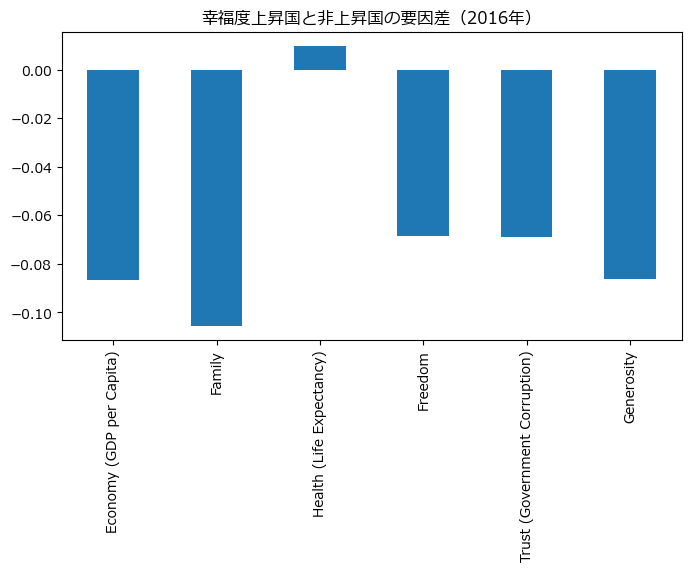

In [51]:
plt.rcParams['font.family'] = 'Meiryo'

comparison['Difference'].plot(
    kind='bar',
    figsize=(8,4),
    title='幸福度上昇国と非上昇国の要因差（2016年）'
)


2016年において幸福度が上昇した国と非上昇国を比較すると、
家族（Family）や経済（GDP per Capita）、自由（Freedom）などの要因では、
上昇国の方が相対的に低い値を示している。一方で、健康（Life Expectancy）は
わずかに正の差を示しており、幸福度の短期的な上昇には
経済や社会的要因よりも健康要因が関与している可能性が示唆される。